In [108]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [109]:
sales = pd.read_excel('Sample - Superstore.xls')

In [110]:
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [111]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [112]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [113]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [114]:
sales['Month'] = sales['Order Date'].dt.month_name()

In [115]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month'],
      dtype='object')

In [116]:
new_sales = sales.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code',
                        'Product ID', 'Product Name', 'City'], axis = 1)

In [117]:
new_sales

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month
0,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,November
1,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,November
2,Second Class,Corporate,United States,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,June
3,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,October
4,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,October
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,January
9990,Standard Class,Consumer,United States,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,February
9991,Standard Class,Consumer,United States,California,West,Technology,Phones,258.5760,2,0.20,19.3932,February
9992,Standard Class,Consumer,United States,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,February


In [118]:
new_sales.isnull().sum()

Ship Mode       0
Segment         0
Country         0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Month           0
dtype: int64

In [119]:
def check(df):
    for i in df.columns:
        if df[i].dtype == 'object':

            print(f'{i} : {df[i].unique()}')

In [120]:
check(new_sales)

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
State : ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Region : ['South' 'West' 'Central' 'East']
Category : ['Furniture' 'Office Supplies' 'Technology']
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fast

In [121]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
def encoder(df):
    encoders = {}  # To store label encoders
    for i in df.columns:
        if df[i].dtype == 'O':
            lb = LabelEncoder()
            df[i] = lb.fit_transform(df[i])
            encoders[i] = lb  # Store the encoder
    return df, encoders


In [122]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def scaler(df):
    for i in df.columns:
        df[[i]] = mm.fit_transform(df[[i]])
    return df

In [123]:
new_sales, encoders = encoder(new_sales)

In [124]:
new_sales = scaler(new_sales)

In [125]:
new_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   float64
 1   Segment       9994 non-null   float64
 2   Country       9994 non-null   float64
 3   State         9994 non-null   float64
 4   Region        9994 non-null   float64
 5   Category      9994 non-null   float64
 6   Sub-Category  9994 non-null   float64
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   float64
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
 11  Month         9994 non-null   float64
dtypes: float64(12)
memory usage: 937.1 KB


In [126]:
x = new_sales.drop('Profit', axis = 1)
y = new_sales['Profit']

In [127]:
x

,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Month
0,0.666667,0.0,0.0,0.312500,0.666667,0.0,0.2500,0.011552,0.076923,0.0000,0.818182
1,0.666667,0.0,0.0,0.312500,0.666667,0.0,0.3125,0.032313,0.153846,0.0000,0.818182
2,0.666667,0.5,0.0,0.062500,1.000000,0.5,0.6250,0.000626,0.076923,0.0000,0.545455
3,1.000000,0.0,0.0,0.166667,0.666667,0.0,1.0000,0.042280,0.307692,0.5625,0.909091
4,1.000000,0.0,0.0,0.166667,0.666667,0.5,0.8750,0.000968,0.076923,0.2500,0.909091
...,...,...,...,...,...,...,...,...,...,...,...
9989,0.666667,0.0,0.0,0.166667,0.666667,0.0,0.5625,0.001096,0.153846,0.2500,0.363636
9990,1.000000,0.0,0.0,0.062500,1.000000,0.0,0.5625,0.004043,0.076923,0.0000,0.272727
9991,1.000000,0.0,0.0,0.062500,1.000000,1.0,0.8125,0.011403,0.076923,0.2500,0.272727
9992,1.000000,0.0,0.0,0.062500,1.000000,0.5,0.7500,0.001288,0.230769,0.0000,0.272727


In [128]:
y

0       0.442794
1       0.454639
2       0.440458
3       0.414464
4       0.440168
          ...   
9989    0.440273
9990    0.441042
9991    0.441293
9992    0.440888
9993    0.444863
Name: Profit, Length: 9994, dtype: float64

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import os
import joblib
import pickle
import xgboost as xgb

XGBoost has been fitted.
XGBoost Metrics:
Mean Squared Error: 8.592052445654863e-05, Mean Absolute Error: 0.0016472196494130024, R^2 Score: 0.6387566642260236



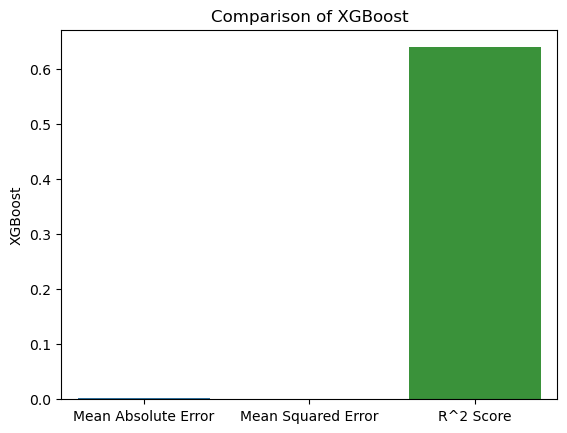

XGBoost model saved to saved_models\XGBoost.pkl


In [137]:
from sklearn.preprocessing import MinMaxScaler

class Models:
    def __init__(self, data, target, encoders):
        self.encoders = encoders
        x = data.drop(target, axis=1)
        y = data[target]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        self.models = {
            'XGBoost': xgb.XGBRegressor(use_label_encoder=False)
        }

        self.metrics = {}

    def fit_models(self):
        for name, model in self.models.items():
            model.fit(self.x_train, self.y_train)
            print(f'{name} has been fitted.')

    def evaluate_models(self):
        for name, model in self.models.items():
            predictions = model.predict(self.x_test)
            mse = mean_squared_error(self.y_test, predictions)
            mae = mean_absolute_error(self.y_test, predictions)
            r2 = r2_score(self.y_test, predictions)

            # Inverse scaling for target variable
            inverse_scaled_predictions = self.inverse_scale_target(predictions, target_scaler)

            self.metrics[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2}

            print(f'{name} Metrics:')
            print(f'Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R^2 Score: {r2}\n')

            return inverse_scaled_predictions

    def inverse_scale_target(self, scaled_target, scaler):
        # Reshape the scaled target array if needed
        scaled_target = scaled_target.reshape(-1, 1) if len(scaled_target.shape) == 1 else scaled_target

        # Use the inverse_transform method of the scaler
        inverse_scaled_target = scaler.inverse_transform(scaled_target)

        # If the result is a 2D array with a single column, flatten it to a 1D array
        if inverse_scaled_target.shape[1] == 1:
            inverse_scaled_target = inverse_scaled_target.flatten()

        return inverse_scaled_target

    def visualize_comparison(self):
        metrics_df = pd.DataFrame(self.metrics)
        for metric in metrics_df.columns:
            sns.barplot(x=metrics_df.index, y=metrics_df[metric])
            plt.title(f'Comparison of {metric}')
            plt.ylabel(metric)
            plt.show()

    def save_model(self, directory='saved_models'):
        if not os.path.exists(directory):
            os.makedirs(directory)

        # Save models
        for name, model in self.models.items():
            filename = os.path.join(directory, f'{name}.pkl')
            with open(filename, 'wb') as file:
                pickle.dump(model, file)
            print(f'{name} model saved to {filename}')

        # Save Label Encoders
        for col, lb in self.encoders.items():
            joblib.dump(lb, os.path.join(directory, f'{col}_encoder.pkl'))

# Example usage:
scaled_data = scaler(new_sales)
target_scaler = MinMaxScaler().fit(new_sales[['Profit']])  # Assuming 'Profit' is the target variable
model = Models(new_sales, 'Profit', encoders)
model.fit_models()
inverse_scaled_predictions = model.evaluate_models()
model.visualize_comparison()
model.save_model()
